# **Pertemuan #15-16: Simple Data Cleaning**

Data Wrangling - Sekolah Data - Pacmann Academy

Pada notebook ini akan dipelajari cara untuk melakukan data wrangling sederhana dengan bantuan visualisasi

**Objective**:
1. Identify and Handling Missing Values
2. Identify and Handling Inkonsistent Format
3. Identify and Handling Outlier

import library

In [21]:
# library pengolahan data
import pandas as pd
import numpy as np

# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
bnb = pd.read_csv("listings.csv")
print(bnb)

                        id                                       listing_url  \
0                    27886                https://www.airbnb.com/rooms/27886   
1                    28871                https://www.airbnb.com/rooms/28871   
2                    29051                https://www.airbnb.com/rooms/29051   
3                    44391                https://www.airbnb.com/rooms/44391   
4                    47061                https://www.airbnb.com/rooms/47061   
...                    ...                                               ...   
10163  1437492870456891135  https://www.airbnb.com/rooms/1437492870456891135   
10164  1437585511300942515  https://www.airbnb.com/rooms/1437585511300942515   
10165  1437601466510408215  https://www.airbnb.com/rooms/1437601466510408215   
10166  1437660079651924451  https://www.airbnb.com/rooms/1437660079651924451   
10167  1438602403155395239  https://www.airbnb.com/rooms/1438602403155395239   

            scrape_id last_scraped     

In [23]:
bnb.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.74
3,44391,https://www.airbnb.com/rooms/44391,20250609011745,2025-06-17,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,47061,https://www.airbnb.com/rooms/47061,20250609011745,2025-06-17,city scrape,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",NaN,https://a0.muscache.com/pictures/268343/a08ce2...,211696,...,4.90,4.85,4.63,0363 1266 8C04 4133 E6AC,f,1,1,0,0,1.13


---
# **1. Identify and Handling Missing Values**

- Salah satu permasalah yang sering muncul, yaitu adanya missing value pada data.
- Dalam notebook ini, kolom yang memiliki persentase missing value lebih dari 90% akan dihapus dari dataset.
- Sebelum melakukannya, terlebih dahulu akan kita identifikasi kolom yang memiliki missing value.

In [24]:
# mengubah setting dispaly kolom maksimum dari pandas dataframe untuk melihat keseluruhan data
pd.set_option("display.max_rows", len(bnb.columns))

In [25]:
# mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
nan_col = bnb.isna().sum().sort_values(ascending= False)
nan_col

neighbourhood_group_cleansed                    10168
calendar_updated                                10168
host_neighbourhood                               7354
neighbourhood                                    4910
neighborhood_overview                            4910
host_about                                       4796
estimated_revenue_l365d                          3847
price                                            3847
beds                                             3827
bathrooms                                        3791
host_response_rate                               3528
host_response_time                               3528
host_acceptance_rate                             2231
host_location                                    1144
review_scores_cleanliness                         971
last_review                                       970
review_scores_location                            970
review_scores_checkin                             970
review_scores_accuracy      

In [26]:
# mendapatkan presentase missing values tiap kolom
n_data = len(bnb)

# mencari presentase nan / missing values dengan cara membagi missing values / n_data * 100
percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

neighbourhood_group_cleansed                    100.000000
calendar_updated                                100.000000
host_neighbourhood                               72.324941
neighbourhood                                    48.288749
neighborhood_overview                            48.288749
host_about                                       47.167585
estimated_revenue_l365d                          37.834382
price                                            37.834382
beds                                             37.637687
bathrooms                                        37.283635
host_response_rate                               34.697089
host_response_time                               34.697089
host_acceptance_rate                             21.941385
host_location                                    11.250983
review_scores_cleanliness                         9.549567
last_review                                       9.539732
review_scores_location                            9.5397

In [27]:
# buat dalam bentuk dataframe
column_contain_nan = pd.DataFrame(percent_nan_col[percent_nan_col > 0], 
                                  columns= ["%nan"])

# menampilkan data 15 teratas




















column_contain_nan.head(15)

,%nan
neighbourhood_group_cleansed,100.000000
calendar_updated,100.000000
host_neighbourhood,72.324941
neighbourhood,48.288749
neighborhood_overview,48.288749
host_about,47.167585
estimated_revenue_l365d,37.834382
price,37.834382
beds,37.637687
bathrooms,37.283635


kalau kurang intuitif kita bisa coba visualisakan

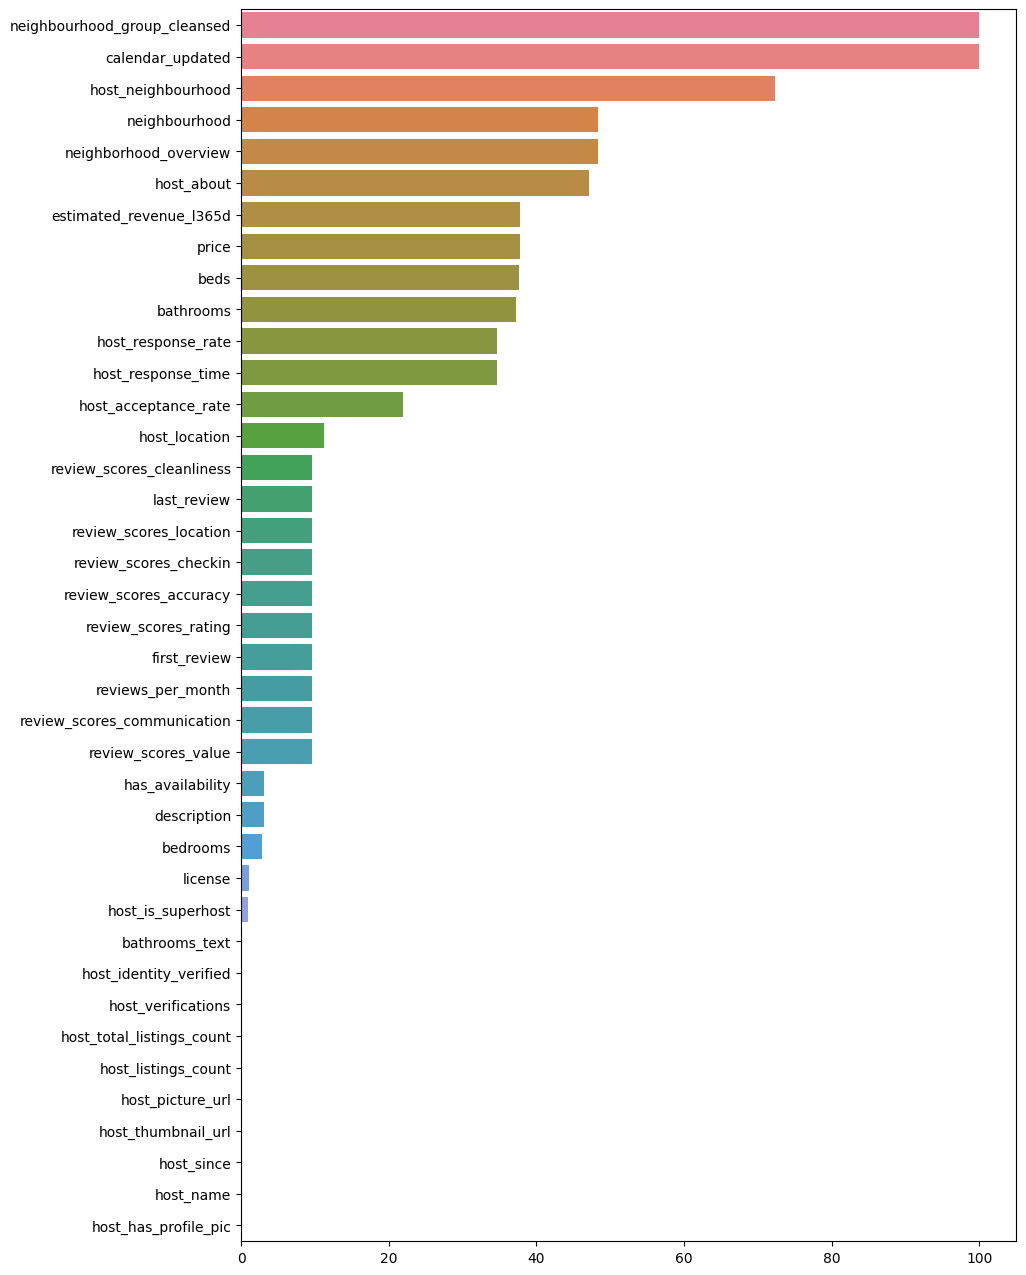

In [28]:
# buat figure
fig, ax = plt.subplots(figsize = (10, 16))

# buat barplot presentase NaN tiap kolom 
sns.barplot(data = column_contain_nan.T, 
            orient="h", 
            ax = ax)

# menampilkan visualisasi
plt.show()

- Oke, sekarang sudah lebih intuitif
- Next, terlihat beberapa kolom memiliki persentase missing value lebih dari 90%
- Ini coba kita drop

In [29]:
# cari kolom yang presentase missing valuesnya lebih dari 90 %
nan_col_abv90 = percent_nan_col[percent_nan_col > 90 ].index
nan_col_abv90

Index(['neighbourhood_group_cleansed', 'calendar_updated'], dtype='object')

In [30]:
# kita menghapus kolom dengan nilai NaN lebih dari 90 % 
bnb = bnb.drop(columns = nan_col_abv90)

bnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.74
3,44391,https://www.airbnb.com/rooms/44391,20250609011745,2025-06-17,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,47061,https://www.airbnb.com/rooms/47061,20250609011745,2025-06-17,city scrape,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",NaN,https://a0.muscache.com/pictures/268343/a08ce2...,211696,...,4.90,4.85,4.63,0363 1266 8C04 4133 E6AC,f,1,1,0,0,1.13


In [31]:
bnb.shape

(10168, 77)

columns yang awalnya berjumlah 79 berkurang menjadi 77 

kita sudah menghapus berhasil nilai NaN yang presentasenya diatas 90 % 

---
# **2. Identify and Handling Inkonsistent Format**

- Salah satu inkonsistensi yang bisa terjadi adalah, tipe data yang tidak sesuai dengan representasi datanya.
- Pada kasus ini kita akan mengidentifikasi inkonsistensi ini pada kolom price.

In [32]:
# menampilkan informasi pada columns price
bnb[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   6321 non-null   object
dtypes: object(1)
memory usage: 79.6+ KB


In [33]:
# menampilkan 5 data teratas kolom price
bnb['price'].head()

0    $132.00
1     $78.00
2     $70.00
3        NaN
4    $120.00
Name: price, dtype: object

Dari pengecekan diatas, terlihat
- kolom price yang seharusnya direpresentasikan sebagai kolom numeric, memiliki tipe data object.
- Kita akan mengconvert kolom price tersebut sehingga bertipe float.
- Pertama, kita akan mengidentifikasi data unik pada kolom price.

In [34]:
# data unik dari pada kolom price
bnb['price'].unique()

array(['$132.00', '$78.00', '$70.00', nan, '$120.00', '$284.00',
       '$457.00', '$198.00', '$139.00', '$200.00', '$59.00', '$407.00',
       '$279.00', '$265.00', '$63.00', '$248.00', '$203.00', '$158.00',
       '$237.00', '$267.00', '$687.00', '$116.00', '$180.00', '$179.00',
       '$450.00', '$1,036.00', '$188.00', '$169.00', '$854.00', '$133.00',
       '$325.00', '$136.00', '$245.00', '$299.00', '$190.00', '$580.00',
       '$150.00', '$123.00', '$241.00', '$170.00', '$157.00', '$60.00',
       '$355.00', '$250.00', '$630.00', '$500.00', '$215.00', '$210.00',
       '$175.00', '$350.00', '$225.00', '$125.00', '$101.00', '$315.00',
       '$69.00', '$86.00', '$138.00', '$143.00', '$340.00', '$283.00',
       '$318.00', '$156.00', '$124.00', '$80.00', '$249.00', '$152.00',
       '$166.00', '$148.00', '$395.00', '$87.00', '$100.00', '$160.00',
       '$233.00', '$187.00', '$476.00', '$386.00', '$129.00', '$300.00',
       '$72.00', '$294.00', '$122.00', '$130.00', '$499.00', '$1

Summary:

- Semua data price memiliki tanda `$`
- Untuk price yang mencapai ribuan, digunakan tanda `,` (koma).

Sebelum mengconvert data tersebut menjadi float, kita akan menghilangkan tanda `$` dan `,` dari data price.

In [35]:
# menghilangkan tanda $
bnb['price'] = bnb['price'].str.replace('$', "")

# menghilangkan tanda , (koma)
bnb['price'] = bnb['price'].str.replace(",", "")

# Terakhir, convert tipe data menjadi float
bnb['price'] = bnb['price'].astype(float)

validasi

In [36]:
# menampilkan informasi pada kolom price
bnb[['price']].info()

# sudah berubah jadi float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6321 non-null   float64
dtypes: float64(1)
memory usage: 79.6 KB


In [37]:
# Data unik pada kolom price
bnb['price'].unique()

array([1.3200e+02, 7.8000e+01, 7.0000e+01,        nan, 1.2000e+02,
       2.8400e+02, 4.5700e+02, 1.9800e+02, 1.3900e+02, 2.0000e+02,
       5.9000e+01, 4.0700e+02, 2.7900e+02, 2.6500e+02, 6.3000e+01,
       2.4800e+02, 2.0300e+02, 1.5800e+02, 2.3700e+02, 2.6700e+02,
       6.8700e+02, 1.1600e+02, 1.8000e+02, 1.7900e+02, 4.5000e+02,
       1.0360e+03, 1.8800e+02, 1.6900e+02, 8.5400e+02, 1.3300e+02,
       3.2500e+02, 1.3600e+02, 2.4500e+02, 2.9900e+02, 1.9000e+02,
       5.8000e+02, 1.5000e+02, 1.2300e+02, 2.4100e+02, 1.7000e+02,
       1.5700e+02, 6.0000e+01, 3.5500e+02, 2.5000e+02, 6.3000e+02,
       5.0000e+02, 2.1500e+02, 2.1000e+02, 1.7500e+02, 3.5000e+02,
       2.2500e+02, 1.2500e+02, 1.0100e+02, 3.1500e+02, 6.9000e+01,
       8.6000e+01, 1.3800e+02, 1.4300e+02, 3.4000e+02, 2.8300e+02,
       3.1800e+02, 1.5600e+02, 1.2400e+02, 8.0000e+01, 2.4900e+02,
       1.5200e+02, 1.6600e+02, 1.4800e+02, 3.9500e+02, 8.7000e+01,
       1.0000e+02, 1.6000e+02, 2.3300e+02, 1.8700e+02, 4.7600e

---
# **3. Identify and Handling Outlier**

- Outlier biasanya terdapat pada kolom bertipe numeric.
- Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
- Kita dapat menampilkan sebaran data price menggunakan histogram

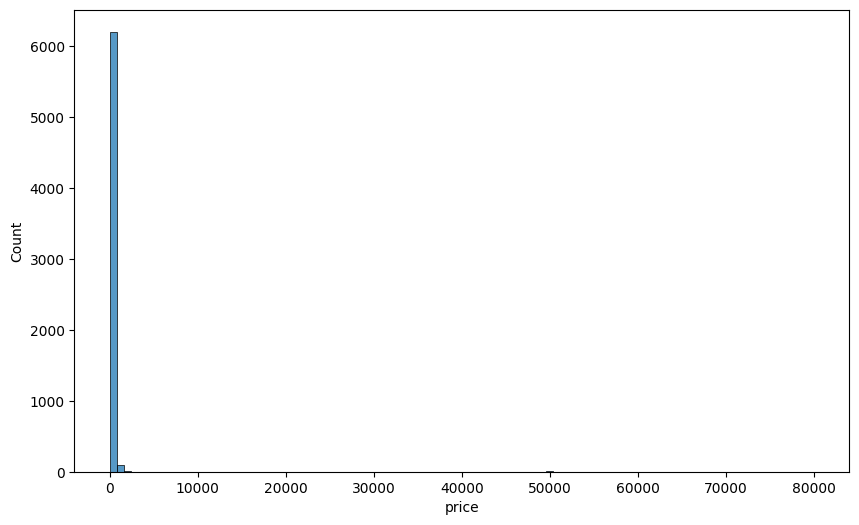

In [39]:
# buat figure dan axes \
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = bnb, 
             x = 'price', 
             bins = 100, 
             ax = ax)

plt.show()

validasi 

In [40]:
bnb['price'].describe()

count     6321.000000
mean       364.922164
std       2288.990696
min          8.000000
25%        162.000000
50%        223.000000
75%        315.000000
max      80018.000000
Name: price, dtype: float64

Masih ingat gambar ini?

<center>
<img src="https://miro.medium.com/max/720/1*0MPDTLn8KoLApoFvI0P2vQ.webp">
<br>
<a href="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">source</a>
</center>



- Kita akan tentukan suatu data adalah outlier, apabila nilainya lebih besar dari Q3 + 1.5 IQR

In [41]:
# cari Q1 dan Q3 
Q1 = bnb.price.quantile(0.25)
Q3 = bnb.price.quantile(0.75)

print(f"Q1 : {Q1: .2f}")
print(f"Q3 : {Q3: .2f}")

Q1 :  162.00
Q3 :  315.00


In [42]:
# cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR: .2F}")
print(f"Maximum Boundary : {max_bound: .2F}")

IQR :  153.00
Maximum Boundary :  544.50


In [44]:
# filter data tanpa outlier
bnb = bnb[bnb['price'] < max_bound]

In [45]:
# validasi hasil filter
bnb['price'].describe()

count    5984.000000
mean      233.609291
std       102.663794
min         8.000000
25%       158.000000
50%       215.000000
75%       296.000000
max       544.000000
Name: price, dtype: float64

- Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
- Outlier telah dihilangkan

<Axes: xlabel='price', ylabel='Count'>

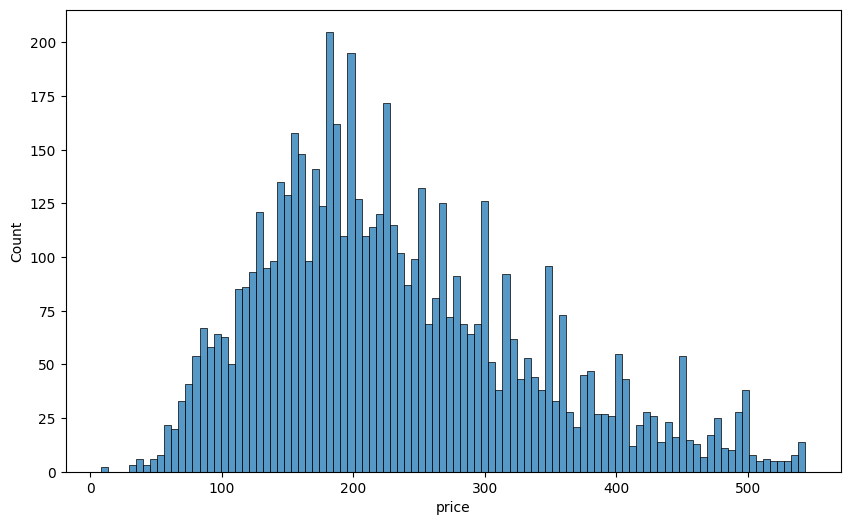

In [46]:
# buat figure dan Axes 
fig, ax = plt.subplots(figsize = (10, 6))

# buat hsitogram plot price
sns.histplot(data = bnb,
             x = 'price', 
             bins = 100, 
             ax = ax)

# visualisasi

---
# **KEY TAKEAWAYS**

Sampai disini kita telah berhasil mengatasi beberapa permasalahan pada data yang dimiliki.
1. Menghapus kolom yang memiliki persentase missing value diatas 90%
2. Mengatasi inkonsistensi pada kolom price
3. Memfilter outlier pada kolom price